In [1]:
from autocnet_server.graph.graph import NetworkCandidateGraph

import glob

#ncg = NetworkCandidateGraph.from_filelist(glob.glob('/scratch/jlaura/ctx_demo/cal/*.cub'))
ncg = NetworkCandidateGraph.from_database()

/home/jlaura/anaconda3/envs/ct/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [ ]:
extractor_params = {'compute_descriptor': True,
                    'float_descriptors': True,
                    'edge_thresh':2.5,
                    'peak_thresh': 0.0001,
                    'verbose': False}

ncg.apply('extract_features_with_tiling',
          on='node',
          extractor_method='vlfeat',
          extractor_parameters=extractor_params, 
          tilesize=5001)

In [2]:
sub = ncg.subgraph(nodes=[80, 86, 90])

In [ ]:
sub.apply('ring_match', on='edge', ring_radius=100, max_radius=1200, target_points=25, tolerance_val=0.1)

In [3]:
sub.apply('compute_fundamental_matrix')

3

In [3]:
sub.apply('compute_fundamental_error')

3

In [ ]:
sub.apply('compute_fundamental_error', method='projection')

In [ ]:
sub.apply('add_coordinates_to_matches', on='edge')

In [ ]:
sub.apply('project_matches', on='edge', args=(3396190, 3376200,), srid=949900)

In [ ]:
sub.apply('subpixel_register', method='phase', template_size=250, search_size=250)


In [ ]:
sub.apply('subpixel_register', method='template', template_size=41, search_size=41)

CLEAN KEYS STILL TODO

In [ ]:
sub.apply('compute_fundamental_matrix')

In [ ]:
sub.apply('compute_fundamental_error')

In [5]:
sub.apply('compute_fundamental_error', method='projection')

3

In [6]:
e = ncg.edges[(80,90)]['data']
c = e.costs
c

,phase,rmse,correlation,fundamental_error,fundamental_equality
28913,0.017753,2.356350e-21,0.855969,1.964096e-04,1.964096e-04
28914,0.019625,1.513699e-18,0.614317,-5.385720e-05,-5.385720e-05
28915,0.027376,1.825291e-18,0.138374,3.302450e-05,3.302450e-05
28916,0.016801,3.352702e-19,0.846051,1.068490e-02,1.068490e-02
28917,0.042080,4.908376e-20,0.987383,-9.000000e-09,-9.000000e-09
28918,0.029176,1.030105e-18,0.881517,-4.084376e-04,-4.084376e-04
28919,0.029861,5.885101e-18,0.890201,1.683565e-04,-6.400000e-09
28920,0.021542,1.681013e-18,0.617322,9.900340e-05,1.683565e-04
28921,0.016194,1.053159e-18,0.728366,-8.302870e-05,-2.140311e-04
28922,0.021918,2.811616e-18,0.928061,1.363393e-04,2.567689e-04


In [3]:
sub.apply('subpixel_register', method='phase', template_size=250, search_size=250)


3

In [3]:
sub.apply('subpixel_register', method='template', template_size=41, search_size=41)

3

In [4]:
sub.apply('ring_match', on='edge', ring_radius=100, max_radius=1200, target_points=25, tolerance_val=0.1)

3

In [9]:
sub.apply('add_coordinates_to_matches', on='edge')

3

In [10]:
sub.apply('project_matches', on='edge', args=(3396190, 3376200,), srid=949900)

3

In [ ]:

for i, m in e.matches():
    

Populating the interactive namespace from numpy and matplotlib


/home/jlaura/anaconda3/envs/ct/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


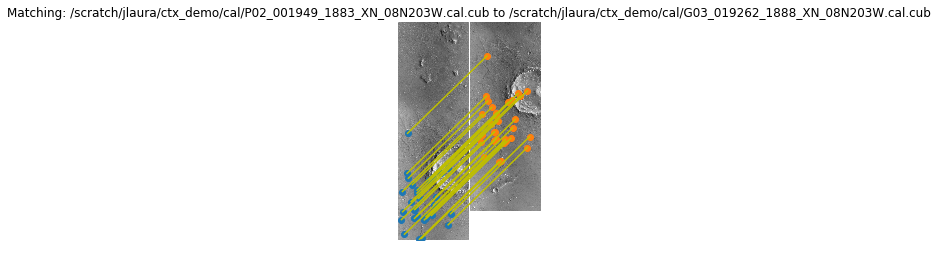

In [7]:
%pylab inline
e = ncg.edges[(80,90)]['data']
e.plot()

Populating the interactive namespace from numpy and matplotlib


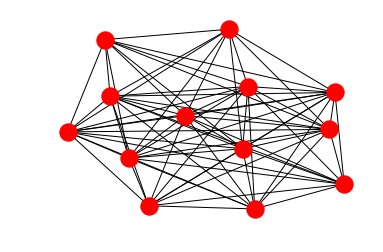

In [2]:
%pylab inline
ncg.plot()

13

In [2]:
for i, n in ncg.nodes(data='data'):
    print(n.nkeypoints)
    if n.nkeypoints < 200000:
        print(n.keypoints)

281649
275547
219474
235634
343987
287393
178723
                  x             y        size     angle            xm  \
0       3132.314453      2.350554    1.854443  3.466712 -3.076745e+06   
1       3600.207520      1.613599    2.030431  0.359307 -3.077733e+06   
2        264.785187      3.236057    2.121787  0.091931 -3.070725e+06   
3        264.785187      3.236057    2.121787  5.546999 -3.070725e+06   
4       3828.991943      2.784405    2.271488  0.168449 -3.078214e+06   
5       4097.959473      3.157985    2.193892  3.233910 -3.078779e+06   
6        229.928970      4.090526    1.789183  4.130303 -3.070652e+06   
7        229.928970      4.090526    1.789183  6.050991 -3.070652e+06   
8       2987.099854      4.390316    1.759109  3.513083 -3.076436e+06   
9       3491.323730      3.593335    2.010599  3.637729 -3.077502e+06   
10      3491.323730      3.593335    2.010599  5.818378 -3.077502e+06   
11      3497.545410      3.725355    1.976395  0.192132 -3.077514e+06   
12

In [3]:
ncg.apply('project_keypoints', on='node')

(82, 
        NodeID: 82
        Image Name: /scratch/jlaura/ctx_demo/cal/G20_026198_1888_XN_08N203W.cal.cub
        Image PATH: /scratch/jlaura/ctx_demo/cal/G20_026198_1888_XN_08N203W.cal.cub
        Number Keypoints: 248599
        Available Masks : Empty DataFrame
Columns: []
Index: []
        Type: <class 'autocnet_server.graph.graph.NetworkNode'>
        )
(90, 
        NodeID: 90
        Image Name: /scratch/jlaura/ctx_demo/cal/G03_019262_1888_XN_08N203W.cal.cub
        Image PATH: /scratch/jlaura/ctx_demo/cal/G03_019262_1888_XN_08N203W.cal.cub
        Number Keypoints: 246932
        Available Masks : Empty DataFrame
Columns: []
Index: []
        Type: <class 'autocnet_server.graph.graph.NetworkNode'>
        )
(80, 
        NodeID: 80
        Image Name: /scratch/jlaura/ctx_demo/cal/P02_001949_1883_XN_08N203W.cal.cub
        Image PATH: /scratch/jlaura/ctx_demo/cal/P02_001949_1883_XN_08N203W.cal.cub
        Number Keypoints: 275547
        Available Masks : Empty DataFrame
Colu

13

Populating the interactive namespace from numpy and matplotlib


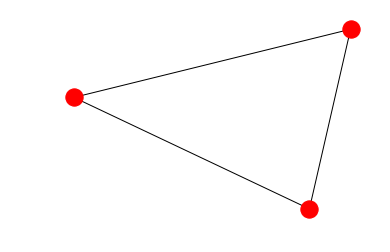

In [4]:
%pylab inline
sub = ncg.subgraph(nodes=[80, 86, 90])
sub.apply('ring_match', on='edge', ring_radius=100, max_radius=1200, target_points=25, tolerance_val=0.1)

TypeError: ring_match is not callable.